In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import PowerTransformer

import statsmodels.api as sm
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.feature_selection import SelectKBest

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,make_scorer,r2_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [2]:
import random
np.random.seed(42)
random.seed(42)

In [3]:
df_diamonds = pd.read_csv("diamonds.csv")

In [4]:
df_diamonds.head()
# We need drop Unnamed: 0 and discard price.

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,330,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,327,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,328,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,337,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,338,4.34,4.35,2.75


In [5]:
df_diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [6]:
df_diamond = df_diamonds.drop(columns = "Unnamed: 0")

In [7]:
print(df_diamond[df_diamond.isna().any(axis=1)])
print(df_diamond[df_diamond.isnull().any(axis=1)])

Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, price, x, y, z]
Index: []
Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, price, x, y, z]
Index: []


In [8]:
df_diamond["cut"].value_counts() 

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [9]:
df_diamond["color"].value_counts() 

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [10]:
df_diamond["clarity"].value_counts() 

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [11]:
train_set, test_set = train_test_split(df_diamond, test_size = 0.2)

In [12]:
train_features = train_set.drop(columns = "price")
train_labels = pd.DataFrame(train_set["price"])

test_features = test_set.drop(columns = "price")
test_labels = pd.DataFrame(test_set["price"])


In [13]:
print(train_features.info(),'\n')
print(train_labels.info(),'\n')
print(test_features.info(),'\n')
print(test_labels.info(),'\n')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43152 entries, 26546 to 15795
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    43152 non-null  float64
 1   cut      43152 non-null  object 
 2   color    43152 non-null  object 
 3   clarity  43152 non-null  object 
 4   depth    43152 non-null  float64
 5   table    43152 non-null  float64
 6   x        43152 non-null  float64
 7   y        43152 non-null  float64
 8   z        43152 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.3+ MB
None 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43152 entries, 26546 to 15795
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   price   43152 non-null  int64
dtypes: int64(1)
memory usage: 674.2 KB
None 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10788 entries, 1388 to 4998
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  

In [14]:
#Pipeline only cat
num_attributes = ["carat","depth","table","x","y","z"]
cat_cut_level = [['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']] 
cat_color_level = [['J', 'I', 'H', 'G', 'F', 'E', 'D']]
cat_clarity_level = [['I1', 'SI2', 'SI1', 'VS2','VS1', 'VVS2','VVS1', 'IF']]
cat_attributes= ["cut","color","clarity"]

full_pipeline_cat = ColumnTransformer(
    transformers = [
    ("cat_cut",     OrdinalEncoder(categories=cat_cut_level),["cut"]),
    ("cat_color",   OrdinalEncoder(categories=cat_color_level),["color"]),
    ("cat_clarity", OrdinalEncoder(categories=cat_clarity_level),["clarity"])
    ],
    remainder = "passthrough"
)
    
train_features_cat = full_pipeline_cat.fit_transform(train_features)
test_features_cat = full_pipeline_cat.transform(test_features)

if(full_pipeline_cat.sparse_output_):
    train_features_cat = train_features_cat.toarray()
    test_features_cat = test_features_cat.toarray()
    
#Make them dataframe
df_train_features_cat = pd.DataFrame(train_features_cat, columns =  cat_attributes + num_attributes )
df_test_features_cat = pd.DataFrame(test_features_cat, columns = cat_attributes + num_attributes )

In [15]:
df_train_features_cat.head()

,cut,color,clarity,carat,depth,table,x,y,z
0,1.0,4.0,1.0,2.01,58.1,64.0,8.23,8.19,4.77
1,2.0,5.0,1.0,1.01,60.0,60.0,6.57,6.49,3.92
2,3.0,2.0,3.0,1.10,62.5,58.0,6.59,6.54,4.10
3,1.0,5.0,1.0,1.50,61.5,65.0,7.21,7.17,4.42
4,2.0,3.0,4.0,1.52,62.1,57.0,7.27,7.32,4.53


In [16]:
#Pipeline with standardscaler
num_attributes = ["carat","depth","table","x","y","z"]
all_atributes =  cat_attributes + num_attributes

num_pipeline_scaler = Pipeline([
    ('std_scaler',StandardScaler()),
])


full_pipeline_scaler = ColumnTransformer(
    transformers = [
    ("num", num_pipeline_scaler, all_atributes),
    ],
    remainder = "passthrough"
)
    

train_features_ss = full_pipeline_scaler.fit_transform(df_train_features_cat)
test_features_ss = full_pipeline_scaler.transform(df_test_features_cat)

if(full_pipeline_scaler.sparse_output_):
    train_features_ss = train_features_ss.toarray()
    test_features_ss = test_features_ss.toarray()
    
#Make them dataframe
df_train_features_ss = pd.DataFrame(train_features_ss, columns = all_atributes)
df_test_features_ss  = pd.DataFrame(test_features_ss, columns = all_atributes)

In [17]:
df_train_features_ss.head()

,cut,color,clarity,carat,depth,table,x,y,z
0,-1.708965,0.347949,-1.246901,2.560056,-2.550748,2.933861,2.229450,2.138209,1.738207
1,-0.812192,0.936621,-1.246901,0.447392,-1.220426,1.139575,0.747550,0.656710,0.537733
2,0.084582,-0.829396,-0.032134,0.637532,0.529996,0.242432,0.765404,0.700284,0.791951
3,-1.708965,0.936621,-1.246901,1.482597,-0.170173,3.382432,1.318885,1.249310,1.243894
4,-0.812192,-0.240724,0.575249,1.524851,0.249928,-0.206140,1.372448,1.380030,1.399249


In [18]:
label_process_ss = StandardScaler()
train_labels_ss = label_process_ss.fit_transform(train_labels)
test_labels_ss = label_process_ss.transform(test_labels)
   
#Make them dataframe
df_train_labels_ss = pd.DataFrame(train_labels_ss, columns = ["price"])
df_test_labels_ss  = pd.DataFrame(test_labels_ss, columns = ["price"])

In [19]:
df_train_labels_ss.head()

,price
0,3.081111
1,0.150504
2,0.448502
3,0.591110
4,2.263058


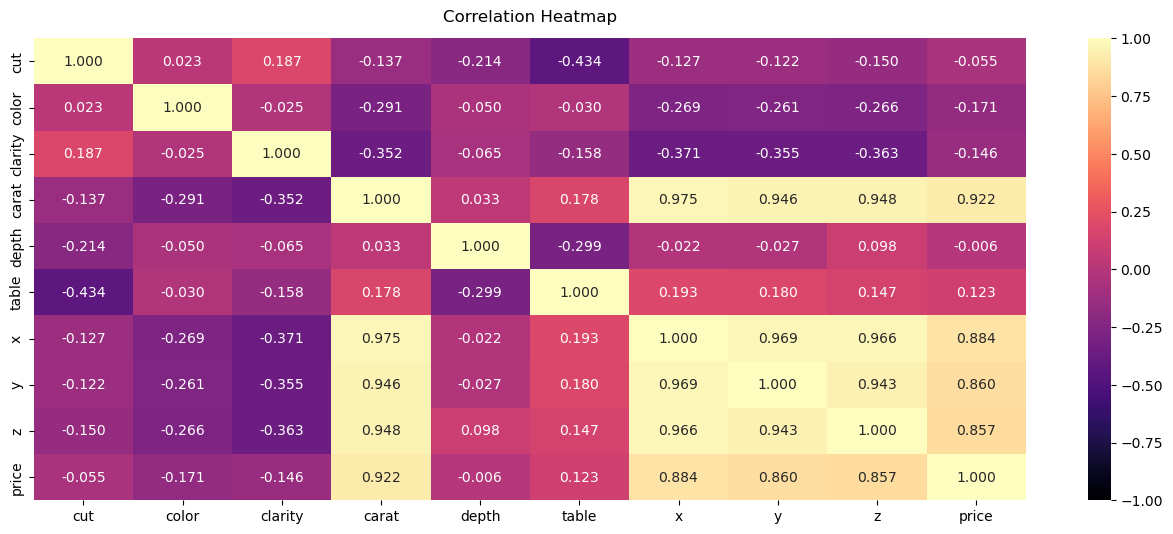

In [20]:
#Q1.1
train_set_ss = pd.concat([df_train_features_ss, df_train_labels_ss],axis = 1)
corr_matrix = train_set_ss.corr(method = 'pearson') 
plt.figure(figsize = (16,6))
h_map = sns.heatmap(corr_matrix, vmin=-1, vmax=1, cbar = True, fmt = '.3f', annot = True,cmap ='magma')
h_map.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

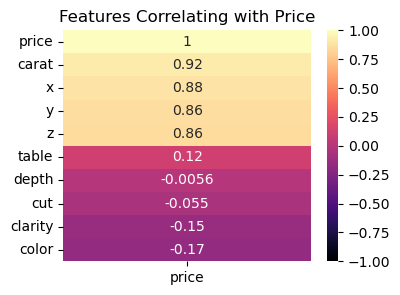

In [21]:
plt.figure(figsize = (4,3))
h_map = sns.heatmap(train_set_ss.corr()[["price"]].sort_values(by = "price",ascending=False),vmin=-1, vmax=1, annot=True,cmap ='magma')
h_map.set_title("Features Correlating with Price")
plt.show()

Text(0.5, 1.0, 'Distribution of table')

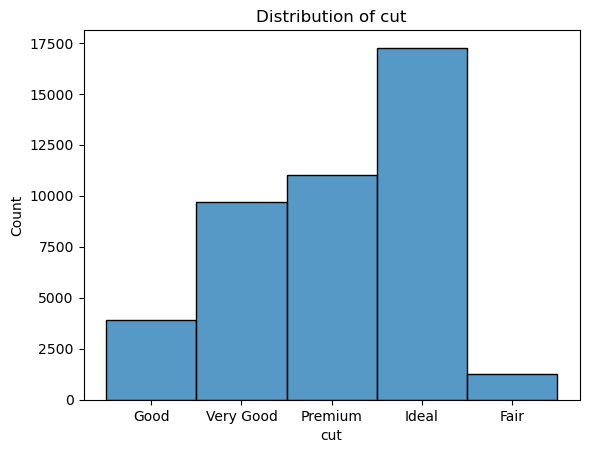

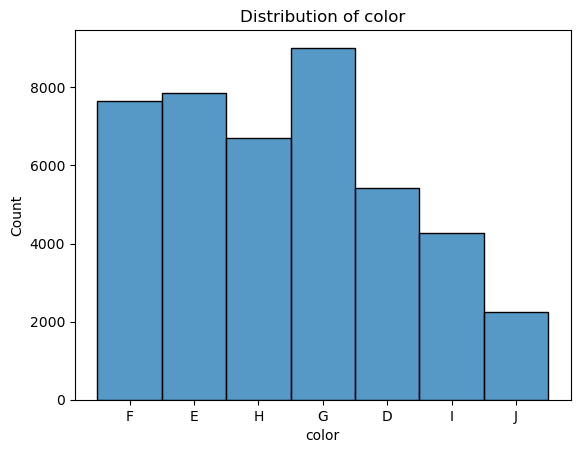

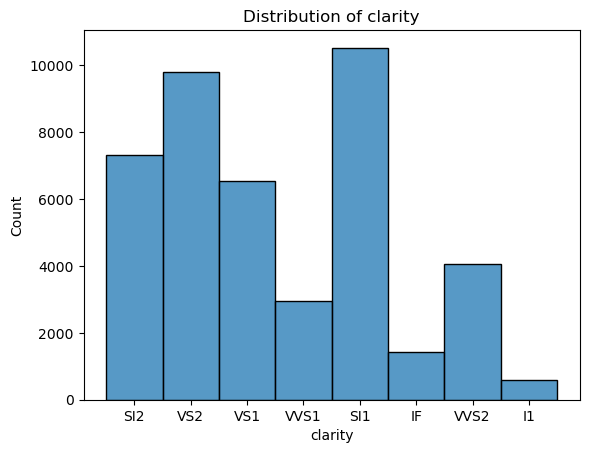

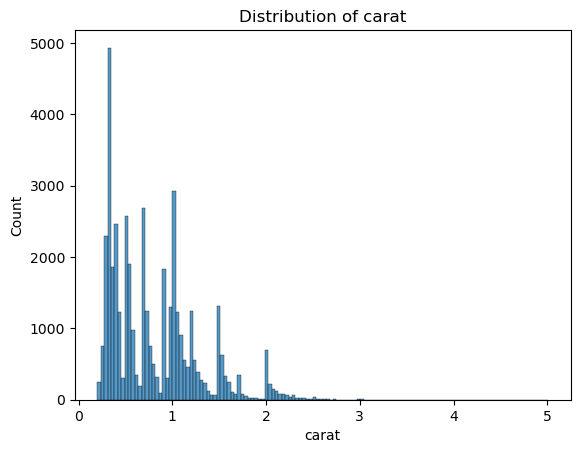

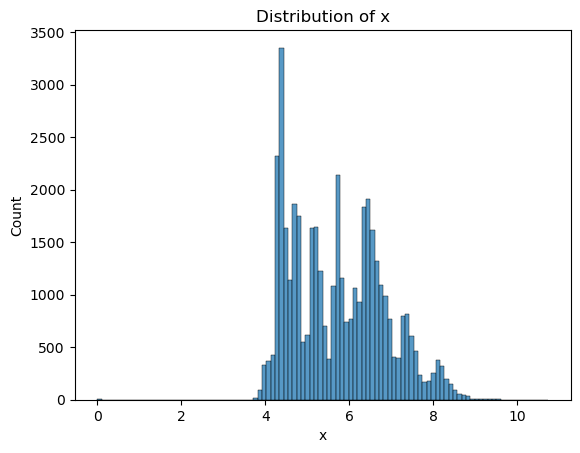

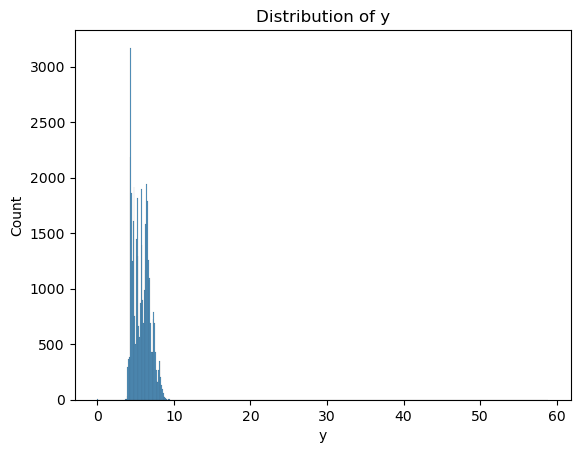

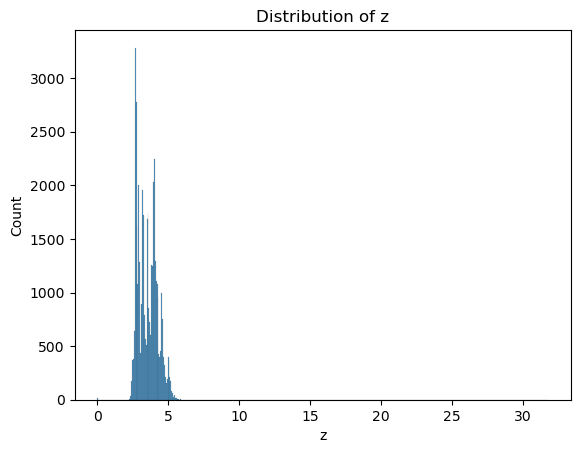

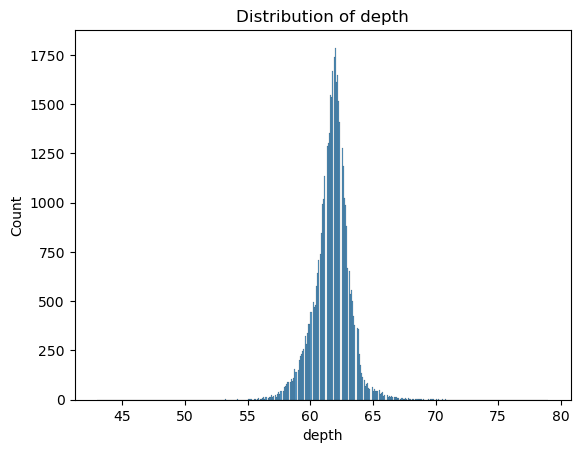

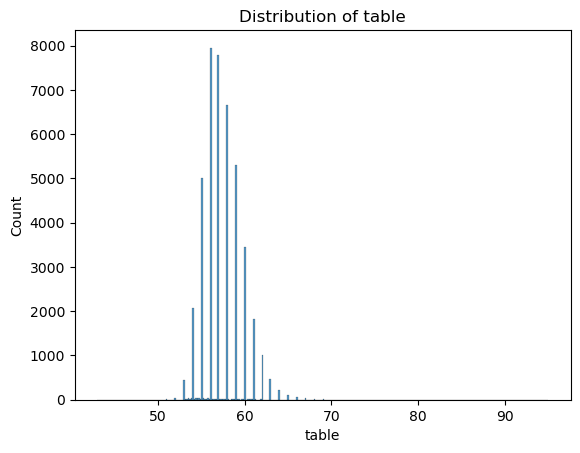

In [22]:
#Q1.2
plt.figure()
sns.histplot(x ="cut", data = train_features,palette="Spectral")
plt.title("Distribution of cut")

plt.figure()
sns.histplot(x ="color", data = train_features,palette="Spectral")
plt.title("Distribution of color")

plt.figure()
sns.histplot(x ="clarity", data = train_features,palette="Spectral")
plt.title("Distribution of clarity")

plt.figure()
sns.histplot(x ="carat", data = train_features,palette="Spectral")
plt.title("Distribution of carat")

plt.figure()
sns.histplot(x ="x", data = train_features,palette="Spectral")
plt.title("Distribution of x")

plt.figure()
sns.histplot(x ="y", data = train_features,palette="Spectral")
plt.title("Distribution of y")

plt.figure()
sns.histplot(x ="z", data = train_features,palette="Spectral")
plt.title("Distribution of z")

plt.figure()
sns.histplot(x ="depth", data = train_features,palette="Spectral")
plt.title("Distribution of depth")

plt.figure()
sns.histplot(x ="table", data = train_features,palette="Spectral")
plt.title("Distribution of table")



In [23]:
#sklearn.preprocessing.PowerTransformer

num_attributes = ["carat","depth","table","x","y","z"]
all_attributes = cat_attributes + num_attributes
num_pipeline_p = Pipeline([
    ('std_scaler',PowerTransformer()),
])

full_pipeline_p = ColumnTransformer(
    transformers = [
    ("num", num_pipeline_p, all_attributes),
    ],
    remainder = "passthrough"
)
    

train_features_p = full_pipeline_p.fit_transform(df_train_features_cat)
test_features_p = full_pipeline_p.transform(df_test_features_cat)

if(full_pipeline_p.sparse_output_):
    train_features_p = train_features_p.toarray()
    test_features_p = test_features_p.toarray()
    
#Make them dataframe
df_train_features_p = pd.DataFrame(train_features_p, columns = all_attributes)
df_test_features_p  = pd.DataFrame(test_features_p, columns = all_attributes)

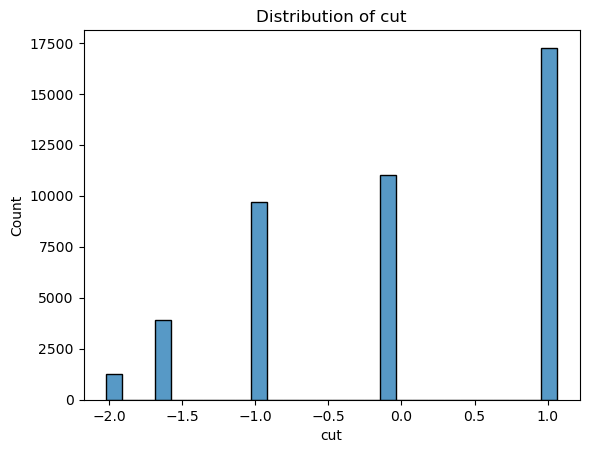

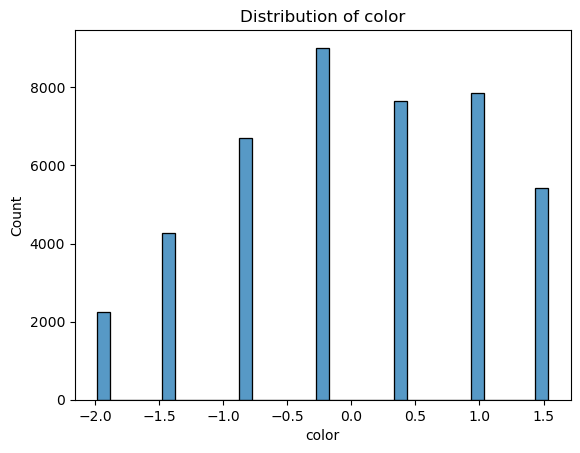

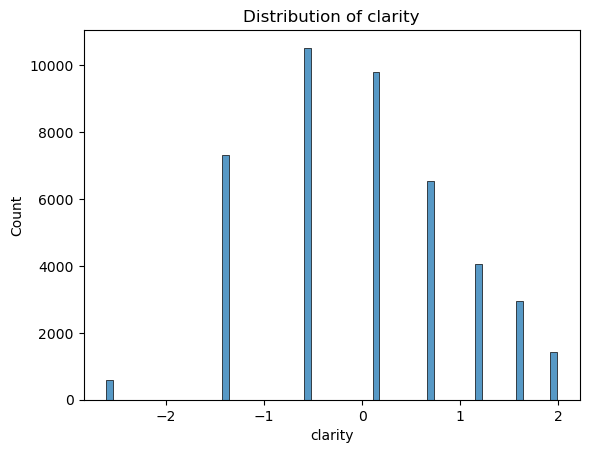

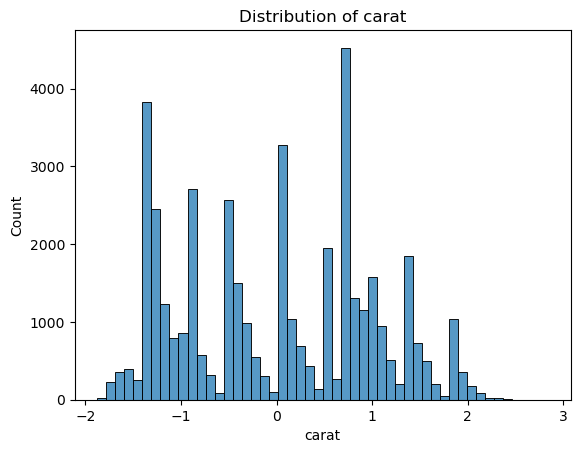

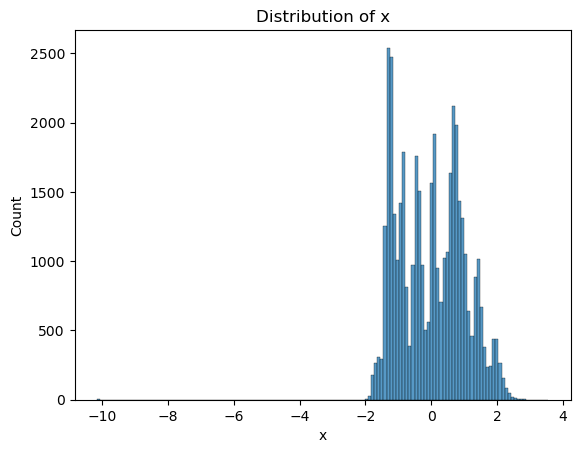

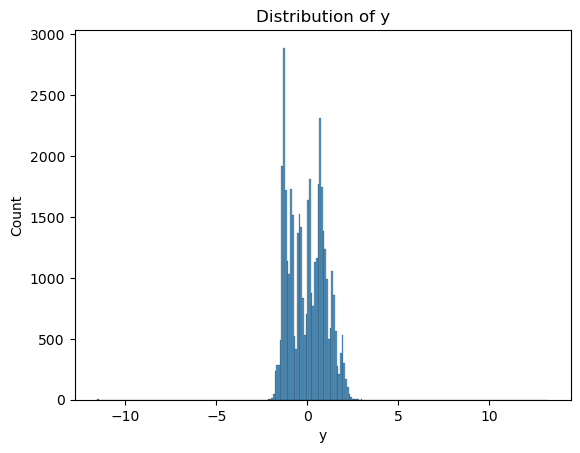

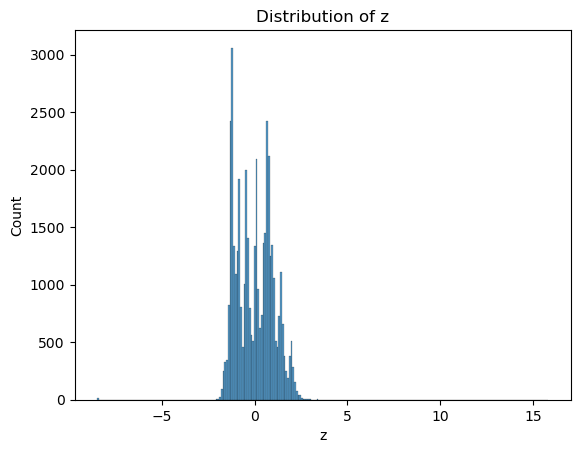

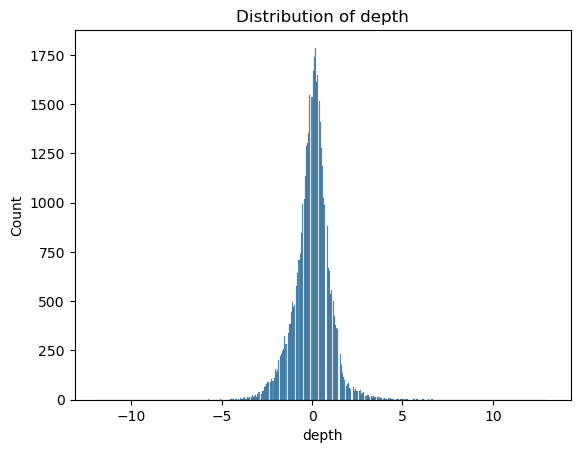

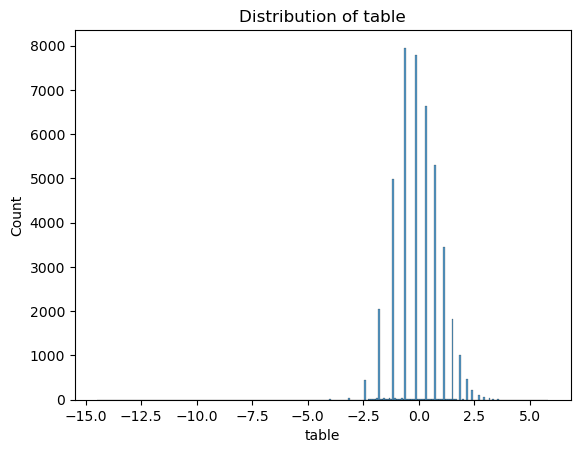

In [24]:
plt.figure()
sns.histplot(x ="cut", data = df_train_features_p,palette="Spectral")
plt.title("Distribution of cut")

plt.figure()
sns.histplot(x ="color", data = df_train_features_p,palette="Spectral")
plt.title("Distribution of color")

plt.figure()
sns.histplot(x ="clarity", data = df_train_features_p,palette="Spectral")
plt.title("Distribution of clarity")

plt.figure()
sns.histplot(x ="carat", data = df_train_features_p,palette="Spectral")
plt.title("Distribution of carat")

plt.figure()
sns.histplot(x ="x", data = df_train_features_p,palette="Spectral")
plt.title("Distribution of x")

plt.figure()
sns.histplot(x ="y", data = df_train_features_p,palette="Spectral")
plt.title("Distribution of y")

plt.figure()
sns.histplot(x ="z", data = df_train_features_p,palette="Spectral")
plt.title("Distribution of z")

plt.figure()
sns.histplot(x ="depth", data = df_train_features_p,palette="Spectral")
plt.title("Distribution of depth")

plt.figure()
sns.histplot(x ="table", data = df_train_features_p,palette="Spectral")
plt.title("Distribution of table")

plt.show()

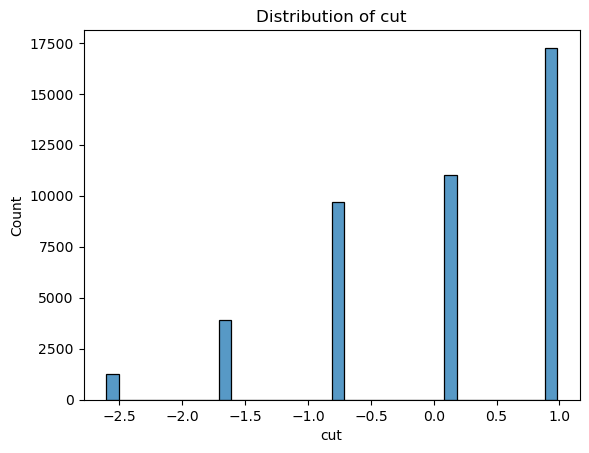

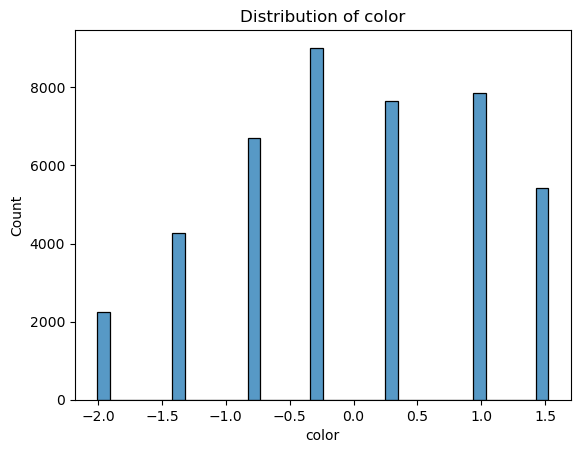

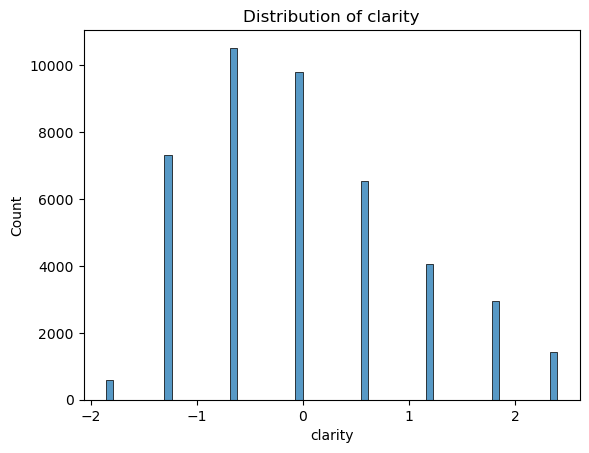

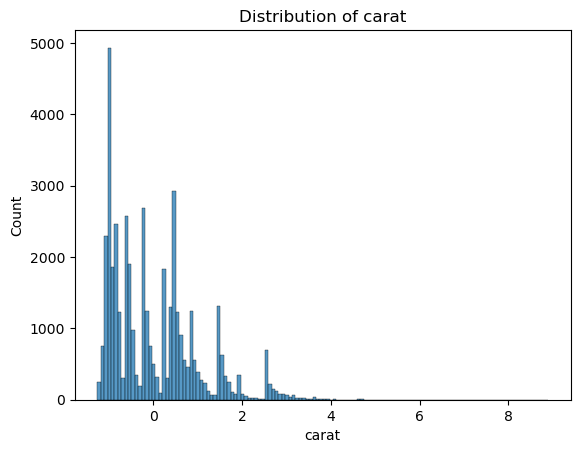

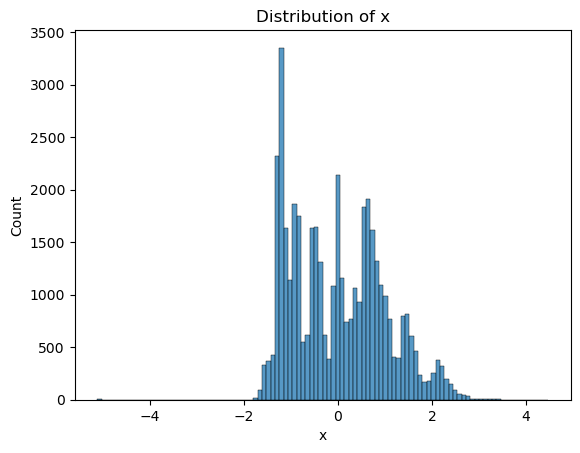

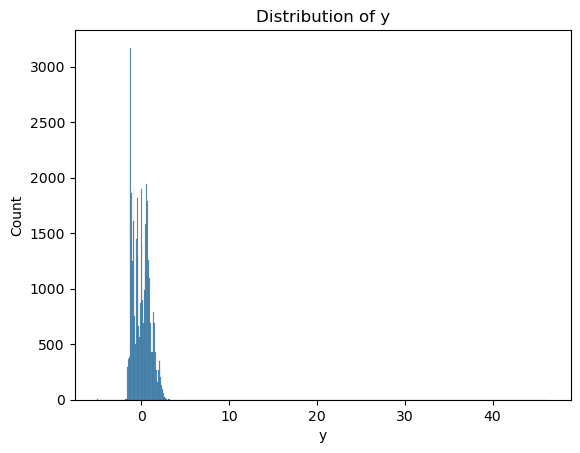

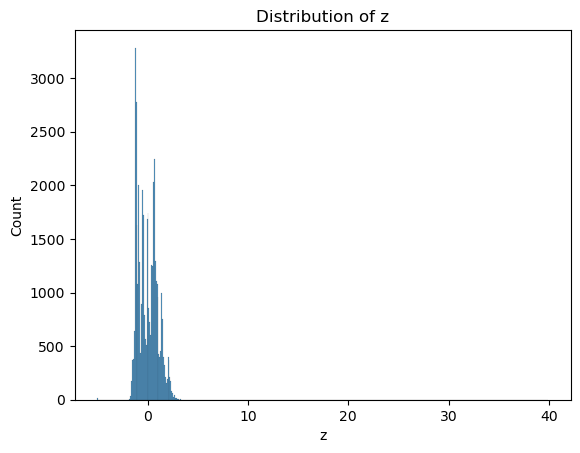

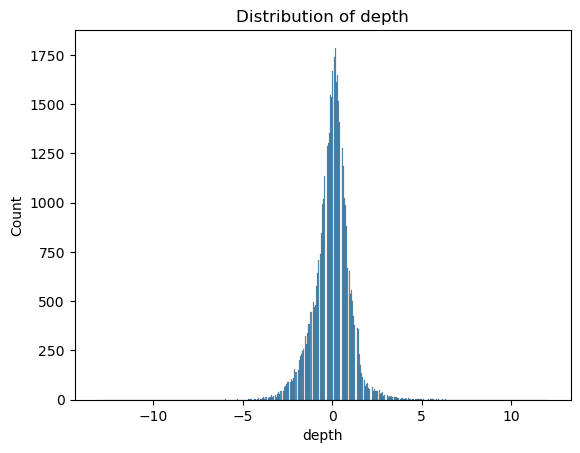

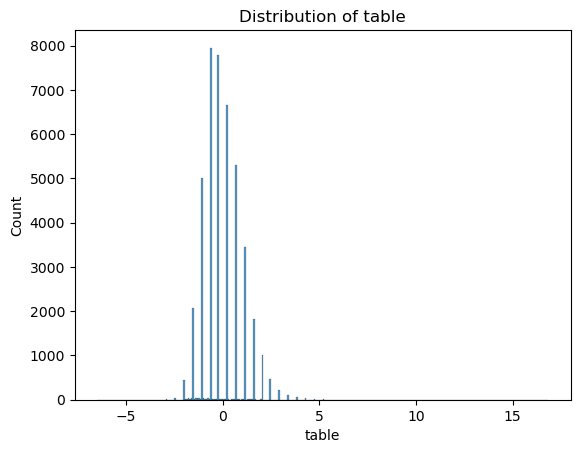

In [25]:
plt.figure()
sns.histplot(x ="cut", data = df_train_features_ss,palette="Spectral")
plt.title("Distribution of cut")

plt.figure()
sns.histplot(x ="color", data = df_train_features_ss,palette="Spectral")
plt.title("Distribution of color")

plt.figure()
sns.histplot(x ="clarity", data = df_train_features_ss,palette="Spectral")
plt.title("Distribution of clarity")

plt.figure()
sns.histplot(x ="carat", data = df_train_features_ss,palette="Spectral")
plt.title("Distribution of carat")

plt.figure()
sns.histplot(x ="x", data = df_train_features_ss,palette="Spectral")
plt.title("Distribution of x")

plt.figure()
sns.histplot(x ="y", data = df_train_features_ss,palette="Spectral")
plt.title("Distribution of y")

plt.figure()
sns.histplot(x ="z", data = df_train_features_ss,palette="Spectral")
plt.title("Distribution of z")

plt.figure()
sns.histplot(x ="depth", data = df_train_features_ss,palette="Spectral")
plt.title("Distribution of depth")

plt.figure()
sns.histplot(x ="table", data = df_train_features_ss,palette="Spectral")
plt.title("Distribution of table")
plt.show()

In [26]:
label_process = PowerTransformer(method = 'box-cox')
train_labels_p = label_process.fit_transform(train_labels)
test_labels_p  = label_process.transform(test_labels)
    
#Make them dataframe
df_train_labels_p  = pd.DataFrame(train_labels_p , columns = ["price"])
df_test_labels_p   = pd.DataFrame(test_labels_p , columns = ["price"])


In [27]:
train_labels

,price
26546,16235
9159,4542
14131,5731
15757,6300
24632,12971
...,...
11284,4976
44732,1618
38158,1018
860,2871


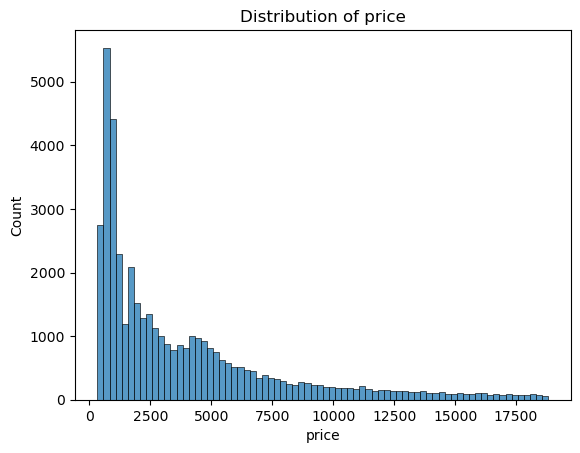

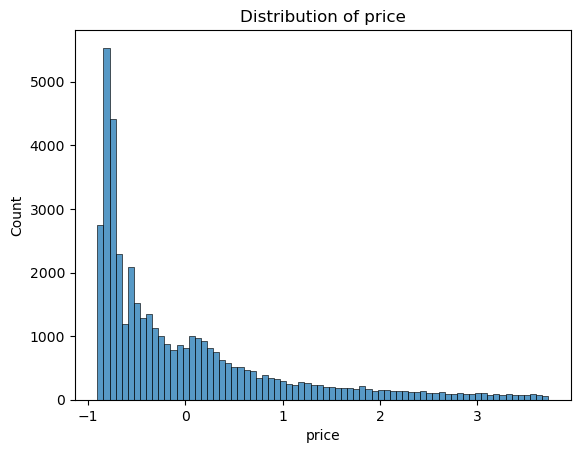

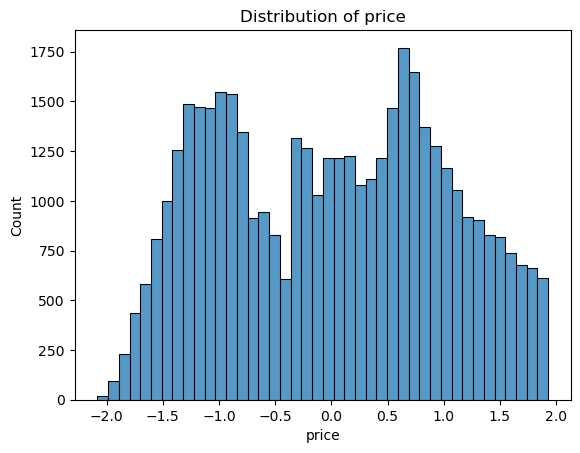

In [28]:
plt.figure()
sns.histplot(x ="price", data = pd.DataFrame(train_labels),palette="Spectral")
plt.title("Distribution of price")
plt.show()


plt.figure()
sns.histplot(x ="price", data = df_train_labels_ss,palette="Spectral")
plt.title("Distribution of price")
plt.show()

plt.figure()
sns.histplot(x ="price", data = df_train_labels_p,palette="Spectral")
plt.title("Distribution of price")
plt.show()

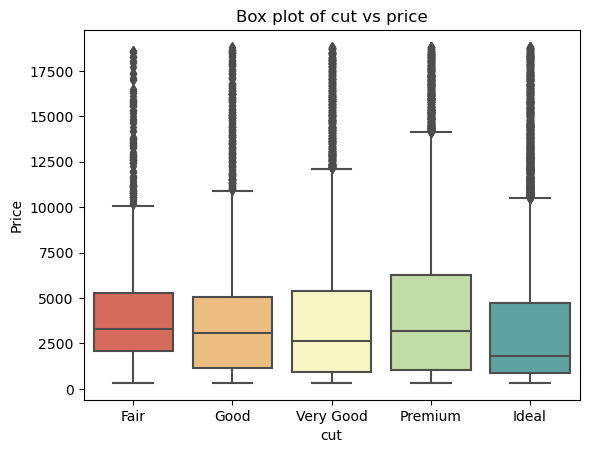

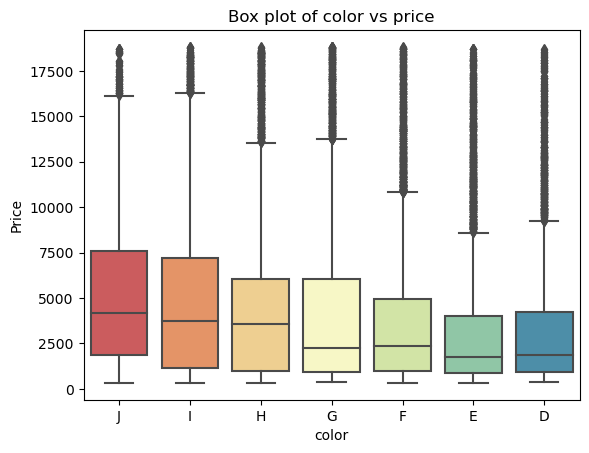

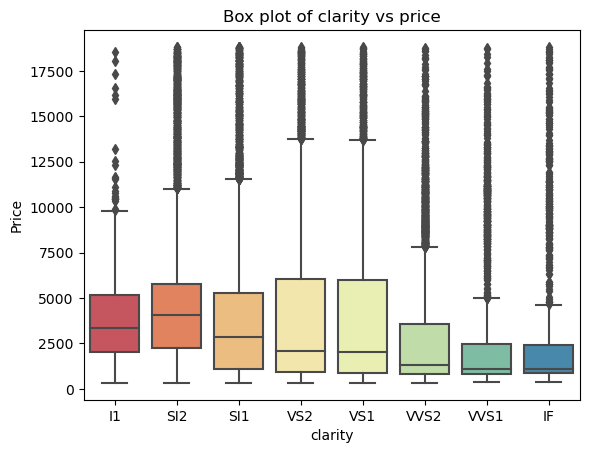

In [29]:
#Q1.3
sns.boxplot(x=train_set["cut"],y=train_set["price"], palette="Spectral",order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])
plt.title("Box plot of cut vs price")
plt.ylabel("Price")

plt.figure()
sns.boxplot(x=train_set["color"],y=train_set["price"], palette="Spectral",order=['J', 'I', 'H', 'G', 'F', 'E', 'D'])
plt.title("Box plot of color vs price")
plt.ylabel("Price")


plt.figure()
sns.boxplot(x=train_set["clarity"],y=train_set["price"], palette="Spectral",order=['I1', 'SI2', 'SI1', 'VS2','VS1', 'VVS2','VVS1', 'IF'])
plt.title("Box plot of clarity vs price")
plt.ylabel("Price")
plt.show()

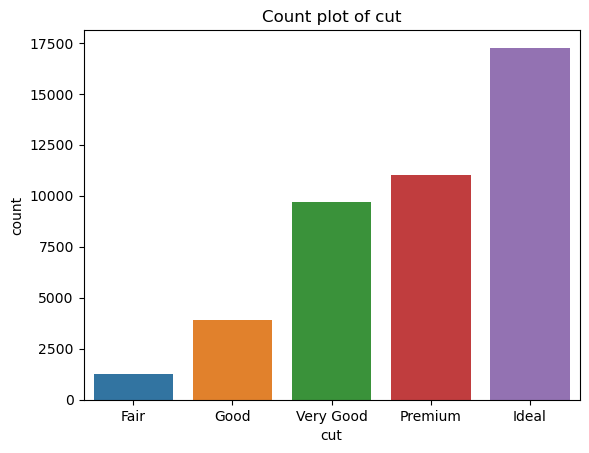

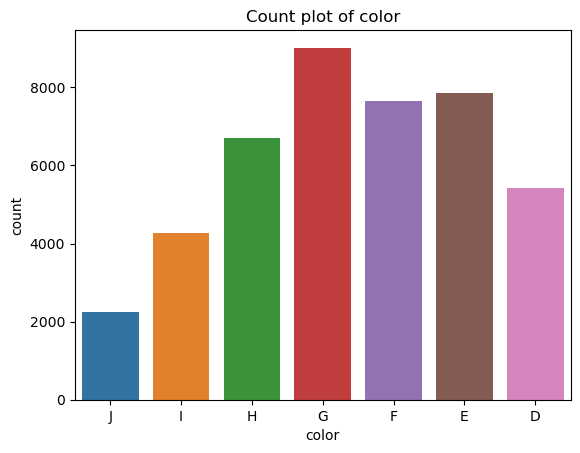

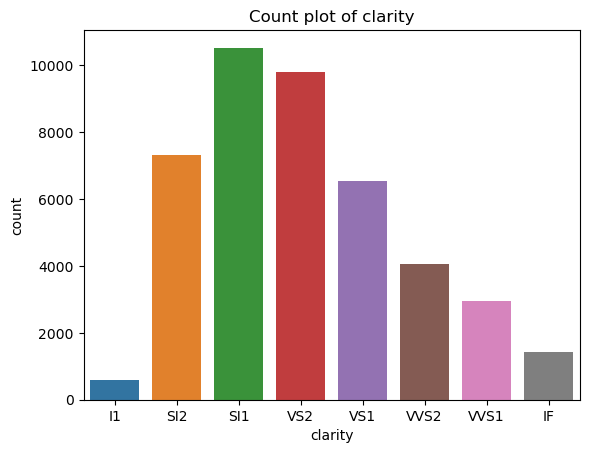

In [30]:
#Q1.4
cat_cut_level = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'] 
cat_color_level = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
cat_clarity_level = ['I1', 'SI2', 'SI1', 'VS2','VS1', 'VVS2','VVS1', 'IF']

plt.figure()
sns.countplot(x=train_set["cut"],order = cat_cut_level)
plt.title("Count plot of cut")

plt.figure()
sns.countplot(x=train_set["color"],order = cat_color_level)
plt.title("Count plot of color")

plt.figure()
sns.countplot(x=train_set["clarity"],order = cat_clarity_level)
plt.title("Count plot of clarity")
plt.show()

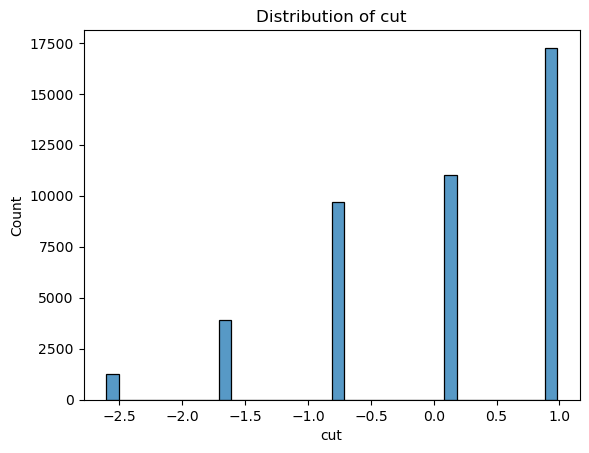

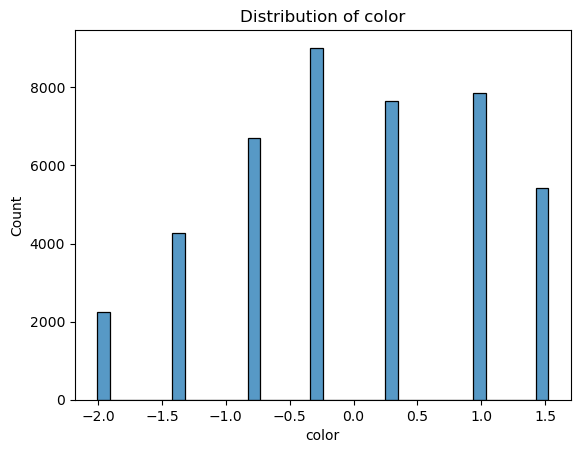

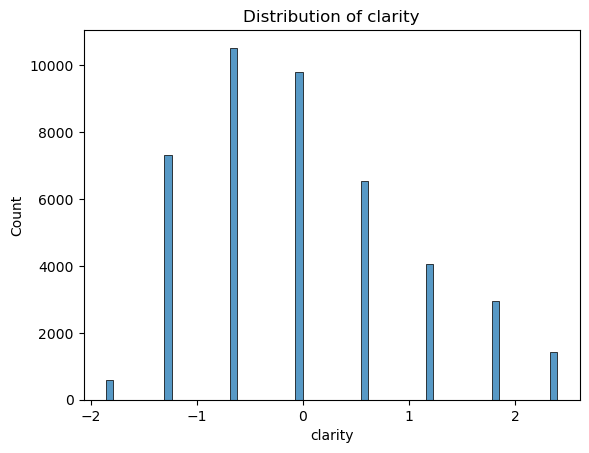

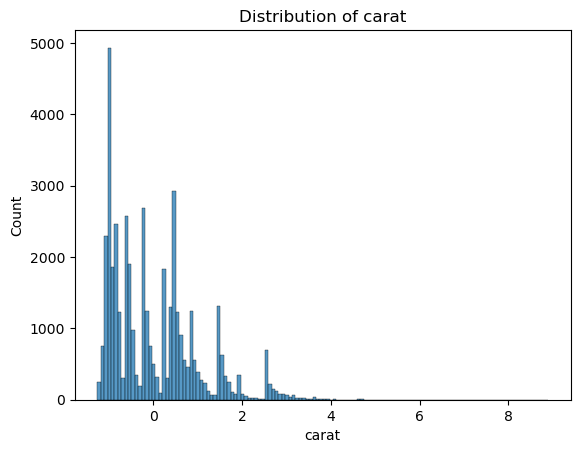

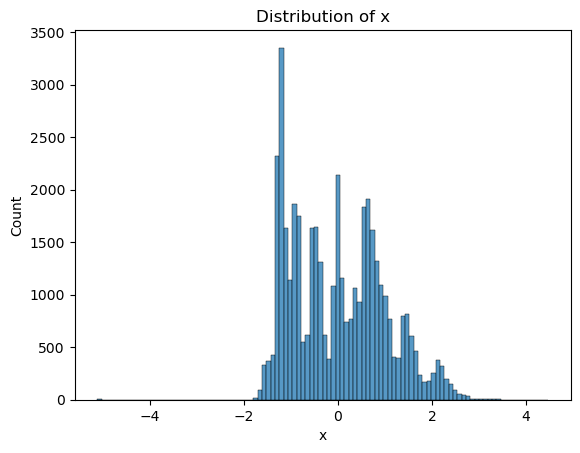

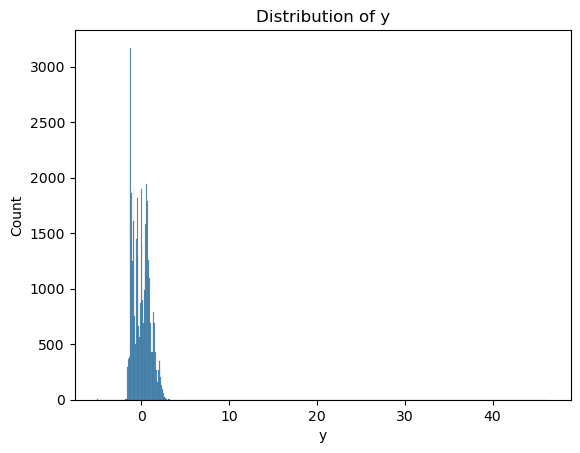

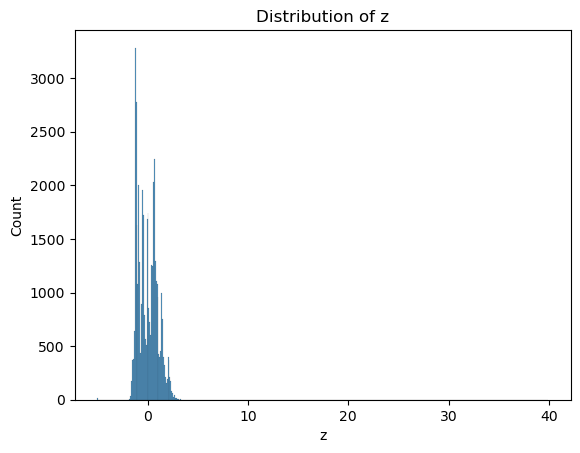

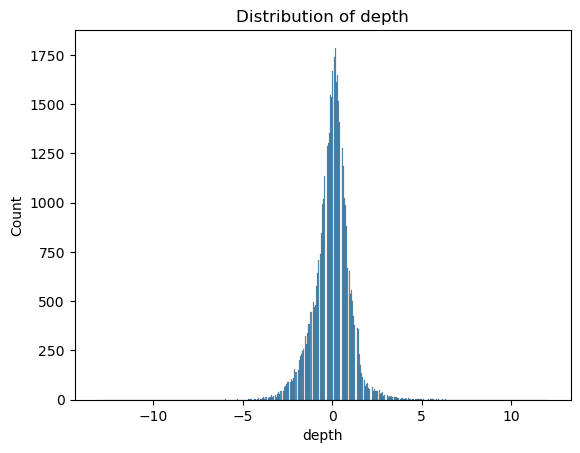

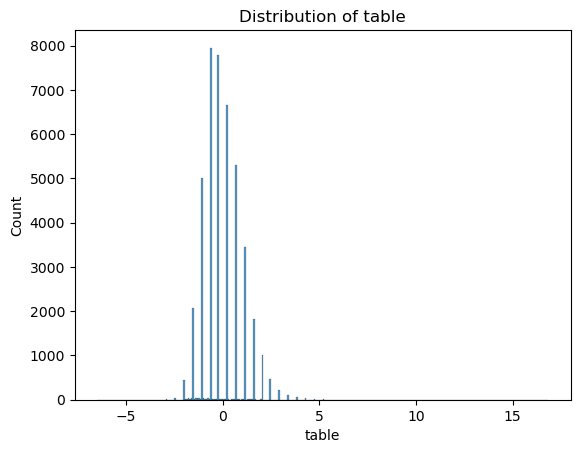

In [31]:
plt.figure()
sns.histplot(x ="cut", data = df_train_features_ss,palette="Spectral")
plt.title("Distribution of cut")

plt.figure()
sns.histplot(x ="color", data = df_train_features_ss,palette="Spectral")
plt.title("Distribution of color")

plt.figure()
sns.histplot(x ="clarity", data = df_train_features_ss,palette="Spectral")
plt.title("Distribution of clarity")

plt.figure()
sns.histplot(x ="carat", data = df_train_features_ss,palette="Spectral")
plt.title("Distribution of carat")

plt.figure()
sns.histplot(x ="x", data = df_train_features_ss,palette="Spectral")
plt.title("Distribution of x")

plt.figure()
sns.histplot(x ="y", data = df_train_features_ss,palette="Spectral")
plt.title("Distribution of y")

plt.figure()
sns.histplot(x ="z", data = df_train_features_ss,palette="Spectral")
plt.title("Distribution of z")

plt.figure()
sns.histplot(x ="depth", data = df_train_features_ss,palette="Spectral")
plt.title("Distribution of depth")

plt.figure()
sns.histplot(x ="table", data = df_train_features_ss,palette="Spectral")
plt.title("Distribution of table")
plt.show()

In [32]:
f_selector = SelectKBest(f_regression,k = "all")
f_selector.fit_transform(df_train_features_ss,np.array(df_train_labels_ss).ravel())
print(f_selector.scores_)
print(f_selector.pvalues_)
print(f_selector.pvalues_ < 0.05) 
print('\n\n\n')
print("All names: ",f_selector.feature_names_in_)
sort_idx_f = np.argsort(f_selector.scores_)[::-1]
print("Sorted names(in decreasing order): ", f_selector.feature_names_in_[sort_idx_f])
print("Statistically insignificant feature(s): ",f_selector.feature_names_in_[f_selector.pvalues_ > 0.05])
#Depth results in p_value > 0.05, so statistically insignificant

[1.31765000e+02 1.30300353e+03 9.44679968e+02 2.43413123e+05
 1.34510791e+00 6.63671853e+02 1.54683575e+05 1.22678015e+05
 1.19280878e+05]
[1.86489902e-030 3.93462874e-281 3.14155919e-205 0.00000000e+000
 2.46141599e-001 2.99336092e-145 0.00000000e+000 0.00000000e+000
 0.00000000e+000]
[ True  True  True  True False  True  True  True  True]




All names:  ['cut' 'color' 'clarity' 'carat' 'depth' 'table' 'x' 'y' 'z']
Sorted names(in decreasing order):  ['carat' 'x' 'y' 'z' 'color' 'clarity' 'table' 'cut' 'depth']
Statistically insignificant feature(s):  ['depth']


In [33]:
mut_info_selector = SelectKBest(mutual_info_regression, k = "all")
mut_info_selector.fit_transform(df_train_features_ss,np.array(df_train_labels_ss).ravel()) # accepts row vector
print(mut_info_selector.scores_)
print('\n\n\n')
print("All names: ",mut_info_selector.feature_names_in_)
sort_idx_mi = np.argsort(mut_info_selector.scores_)[::-1]
print("Sorted names(in decreasing order): ", mut_info_selector.feature_names_in_[sort_idx_mi])

[0.05790352 0.13829415 0.21830227 1.63383819 0.03043483 0.03033969
 1.39600013 1.41089569 1.35315558]




All names:  ['cut' 'color' 'clarity' 'carat' 'depth' 'table' 'x' 'y' 'z']
Sorted names(in decreasing order):  ['carat' 'y' 'x' 'z' 'clarity' 'color' 'cut' 'depth' 'table']


1 0.3883864748206878
Sorted selected names(in decreasing order):  ['carat']
2 0.3829018012761761
Sorted selected names(in decreasing order):  ['carat' 'x']
3 0.38272772164954655
Sorted selected names(in decreasing order):  ['carat' 'x' 'y']
4 0.38141130181955607
Sorted selected names(in decreasing order):  ['carat' 'x' 'y' 'z']
5 0.3675659859137088
Sorted selected names(in decreasing order):  ['carat' 'x' 'y' 'z' 'color']
6 0.3100475303244237
Sorted selected names(in decreasing order):  ['carat' 'x' 'y' 'z' 'color' 'clarity']
7 0.30925717482729564
Sorted selected names(in decreasing order):  ['carat' 'x' 'y' 'z' 'color' 'clarity' 'table']
8 0.30753952244068533
Sorted selected names(in decreasing order):  ['carat' 'x' 'y' 'z' 'color' 'clarity' 'table' 'cut']
9 0.30692312581679887
Sorted selected names(in decreasing order):  ['carat' 'x' 'y' 'z' 'color' 'clarity' 'table' 'cut' 'depth']


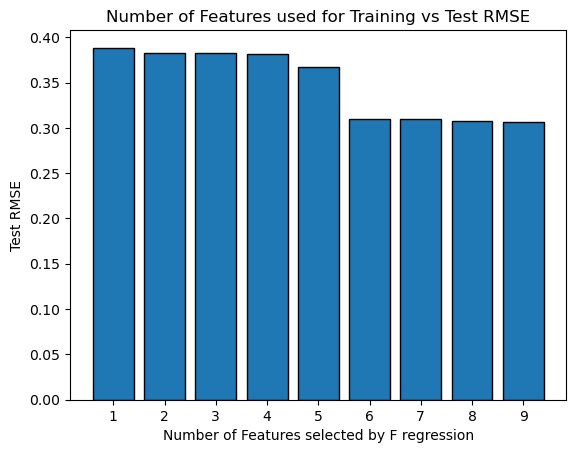

In [34]:
rms_list_f = []
for k in range(1,10):
    f_selector = SelectKBest(f_regression, k = k)
    selected_train_features = f_selector.fit_transform(df_train_features_ss,np.array(df_train_labels_ss).reshape(-1,))
    selected_test_features = f_selector.transform(df_test_features_ss)
    lr_fit = LinearRegression().fit(selected_train_features,df_train_labels_ss)
    preds = lr_fit.predict(selected_test_features)
    rms = mean_squared_error(df_test_labels_ss, preds, squared=False)
    print(k,rms)
    sort_idx_f = np.argsort(f_selector.scores_)[::-1]
    print("Sorted selected names(in decreasing order): ", f_selector.feature_names_in_[sort_idx_f[:k]])
    rms_list_f.append(np.mean(rms))
    
plt.bar(np.arange(1,10),rms_list_f, label = np.arange(1,10),edgecolor = "Black")
plt.xticks(np.arange(1,10))
plt.title("Number of Features used for Training vs Test RMSE")
plt.ylabel("Test RMSE")
plt.xlabel("Number of Features selected by F regression")
plt.show()

1 0.3883864748206878
Sorted selected names(in decreasing order):  ['carat']
2 0.38593860224031123
Sorted selected names(in decreasing order):  ['carat' 'y']
3 0.38272772164954655
Sorted selected names(in decreasing order):  ['carat' 'y' 'x']
4 0.38141130181955607
Sorted selected names(in decreasing order):  ['carat' 'y' 'x' 'z']
5 0.33571242867336865
Sorted selected names(in decreasing order):  ['carat' 'y' 'x' 'z' 'clarity']
6 0.3100475303244237
Sorted selected names(in decreasing order):  ['carat' 'y' 'x' 'z' 'clarity' 'color']
7 0.30757513955397314
Sorted selected names(in decreasing order):  ['carat' 'y' 'x' 'z' 'clarity' 'color' 'cut']
8 0.30753952244068533
Sorted selected names(in decreasing order):  ['carat' 'y' 'x' 'z' 'clarity' 'color' 'cut' 'table']
9 0.30692312581679887
Sorted selected names(in decreasing order):  ['carat' 'y' 'x' 'z' 'clarity' 'color' 'cut' 'depth' 'table']


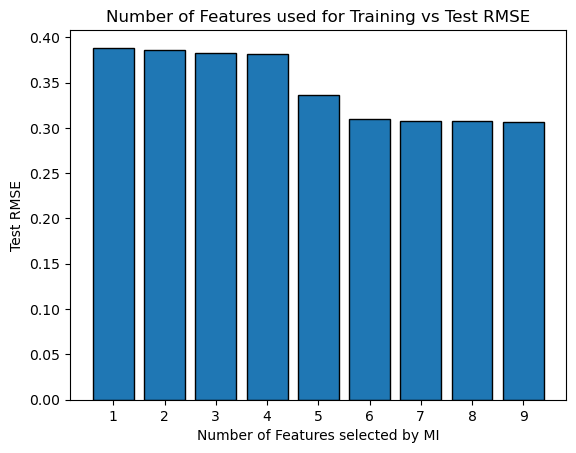

In [35]:
rms_list = []
for k in range(1,10):
    m_i_selector = SelectKBest(mutual_info_regression, k = k)
    selected_train_features = m_i_selector.fit_transform(df_train_features_ss,np.array(df_train_labels_ss).reshape(-1,))
    selected_test_features = m_i_selector.transform(df_test_features_ss)
    lr_fit = LinearRegression().fit(selected_train_features,df_train_labels_ss)
    preds = lr_fit.predict(selected_test_features)
    rms = mean_squared_error(df_test_labels_ss, preds, squared=False)
    print(k,rms)
    sort_idx_mi = np.argsort(m_i_selector.scores_)[::-1]
    print("Sorted selected names(in decreasing order): ", m_i_selector.feature_names_in_[sort_idx_mi[:k]])
    rms_list.append(np.mean(rms))
    
plt.bar(np.arange(1,10),rms_list, label = np.arange(1,10),edgecolor = "Black")
plt.xticks(np.arange(1,10))
plt.title("Number of Features used for Training vs Test RMSE")
plt.ylabel("Test RMSE")
plt.xlabel("Number of Features selected by MI")
plt.show()

1 0.9993144326534182
Sorted selected names(in decreasing order):  ['carat']
2 0.9993144326534182
Sorted selected names(in decreasing order):  ['carat' 'y']
3 0.9993144326534182
Sorted selected names(in decreasing order):  ['carat' 'y' 'x']
4 0.9993144326534182
Sorted selected names(in decreasing order):  ['carat' 'y' 'x' 'z']
5 0.9993144326534182
Sorted selected names(in decreasing order):  ['carat' 'y' 'x' 'z' 'clarity']
6 0.9993144326534182
Sorted selected names(in decreasing order):  ['carat' 'y' 'x' 'z' 'clarity' 'color']
7 0.9993144326534182
Sorted selected names(in decreasing order):  ['carat' 'y' 'x' 'z' 'clarity' 'color' 'cut']
8 0.9993144326534182
Sorted selected names(in decreasing order):  ['carat' 'y' 'x' 'z' 'clarity' 'color' 'cut' 'table']
9 0.9993144326534182
Sorted selected names(in decreasing order):  ['carat' 'y' 'x' 'z' 'clarity' 'color' 'cut' 'table' 'depth']


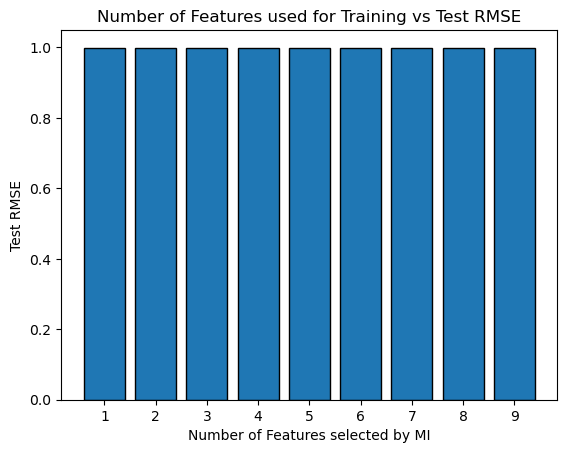

1 0.9993144326534182
Sorted selected names(in decreasing order):  ['carat']
2 0.9993144326534182
Sorted selected names(in decreasing order):  ['carat' 'x']
3 0.9993144326534182
Sorted selected names(in decreasing order):  ['carat' 'x' 'y']
4 0.9993144326534182
Sorted selected names(in decreasing order):  ['carat' 'x' 'y' 'z']
5 0.9993144326534182
Sorted selected names(in decreasing order):  ['carat' 'x' 'y' 'z' 'color']
6 0.9993144326534182
Sorted selected names(in decreasing order):  ['carat' 'x' 'y' 'z' 'color' 'clarity']
7 0.9993144326534182
Sorted selected names(in decreasing order):  ['carat' 'x' 'y' 'z' 'color' 'clarity' 'table']
8 0.9993144326534182
Sorted selected names(in decreasing order):  ['carat' 'x' 'y' 'z' 'color' 'clarity' 'table' 'cut']
9 0.9993144326534182
Sorted selected names(in decreasing order):  ['carat' 'x' 'y' 'z' 'color' 'clarity' 'table' 'cut' 'depth']


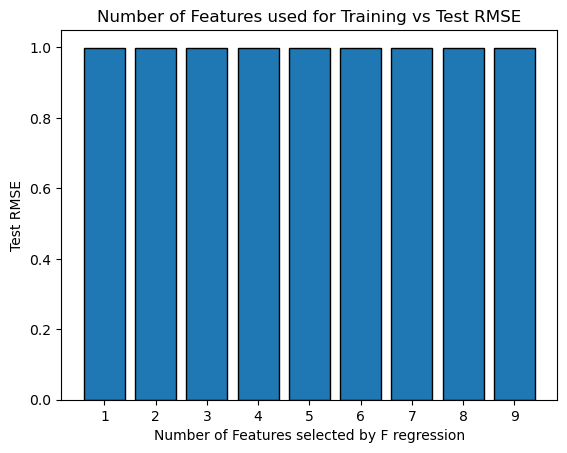

In [36]:
# It is not true for all models, consider Lasso, high alpha
clf = Lasso(alpha = 1e1)

rms_list = []
for k in range(1,10):
    m_i_selector = SelectKBest(mutual_info_regression, k = k)
    selected_train_features = m_i_selector.fit_transform(df_train_features_ss,np.array(df_train_labels_ss).reshape(-1,))
    selected_test_features = m_i_selector.transform(df_test_features_ss)
    lr_fit = clf.fit(selected_train_features,df_train_labels_ss)
    preds = lr_fit.predict(selected_test_features)
    rms = mean_squared_error(df_test_labels_ss, preds, squared=False)
    print(k,rms)
    sort_idx_mi = np.argsort(m_i_selector.scores_)[::-1]
    print("Sorted selected names(in decreasing order): ", m_i_selector.feature_names_in_[sort_idx_mi[:k]])
    rms_list.append(np.mean(rms))
    
plt.bar(np.arange(1,10),rms_list, label = np.arange(1,10),edgecolor = "Black")
plt.xticks(np.arange(1,10))
plt.title("Number of Features used for Training vs Test RMSE")
plt.ylabel("Test RMSE")
plt.xlabel("Number of Features selected by MI")
plt.show()

rms_list_f = []
for k in range(1,10):
    f_selector = SelectKBest(f_regression, k = k)
    selected_train_features = f_selector.fit_transform(df_train_features_ss,np.array(df_train_labels_ss).reshape(-1,))
    selected_test_features = f_selector.transform(df_test_features_ss)
    lr_fit = clf.fit(selected_train_features,df_train_labels_ss)
    preds = lr_fit.predict(selected_test_features)
    rms = mean_squared_error(df_test_labels_ss, preds, squared=False)
    print(k,rms)
    sort_idx_f = np.argsort(f_selector.scores_)[::-1]
    print("Sorted selected names(in decreasing order): ", f_selector.feature_names_in_[sort_idx_f[:k]])
    rms_list_f.append(np.mean(rms))
    
plt.bar(np.arange(1,10),rms_list_f, label = np.arange(1,10),edgecolor = "Black")
plt.xticks(np.arange(1,10))
plt.title("Number of Features used for Training vs Test RMSE")
plt.ylabel("Test RMSE")
plt.xlabel("Number of Features selected by F regression")
plt.show()

1 0.38832587222954446
Sorted selected names(in decreasing order):  ['carat']
2 0.38832587222954446
Sorted selected names(in decreasing order):  ['carat' 'y']
3 0.38832587222954446
Sorted selected names(in decreasing order):  ['carat' 'y' 'x']
4 0.38832587222954446
Sorted selected names(in decreasing order):  ['carat' 'y' 'x' 'z']
5 0.33873630386604403
Sorted selected names(in decreasing order):  ['carat' 'y' 'x' 'z' 'clarity']
6 0.3141770114805993
Sorted selected names(in decreasing order):  ['carat' 'y' 'x' 'z' 'clarity' 'color']
7 0.3116796187594117
Sorted selected names(in decreasing order):  ['carat' 'y' 'x' 'z' 'clarity' 'color' 'cut']
8 0.3115939269748065
Sorted selected names(in decreasing order):  ['carat' 'y' 'x' 'z' 'clarity' 'color' 'cut' 'depth']
9 0.31159402202940617
Sorted selected names(in decreasing order):  ['carat' 'y' 'x' 'z' 'clarity' 'color' 'cut' 'depth' 'table']


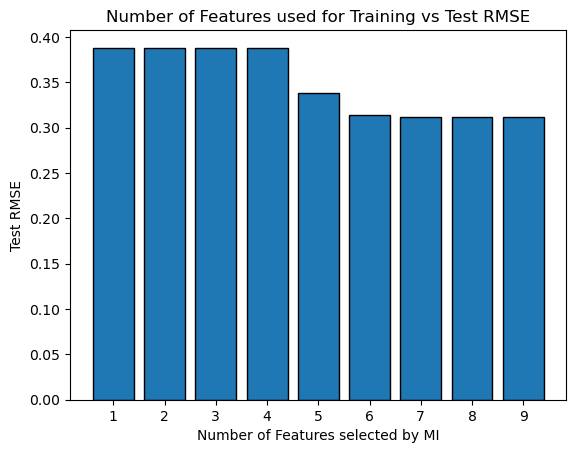

1 0.38832587222954446
Sorted selected names(in decreasing order):  ['carat']
2 0.38832587222954446
Sorted selected names(in decreasing order):  ['carat' 'x']
3 0.38832587222954446
Sorted selected names(in decreasing order):  ['carat' 'x' 'y']
4 0.38832587222954446
Sorted selected names(in decreasing order):  ['carat' 'x' 'y' 'z']
5 0.37595619649587336
Sorted selected names(in decreasing order):  ['carat' 'x' 'y' 'z' 'color']
6 0.3141770114805993
Sorted selected names(in decreasing order):  ['carat' 'x' 'y' 'z' 'color' 'clarity']
7 0.3136299494055182
Sorted selected names(in decreasing order):  ['carat' 'x' 'y' 'z' 'color' 'clarity' 'table']
8 0.31168031394901896
Sorted selected names(in decreasing order):  ['carat' 'x' 'y' 'z' 'color' 'clarity' 'table' 'cut']
9 0.31159402202940617
Sorted selected names(in decreasing order):  ['carat' 'x' 'y' 'z' 'color' 'clarity' 'table' 'cut' 'depth']


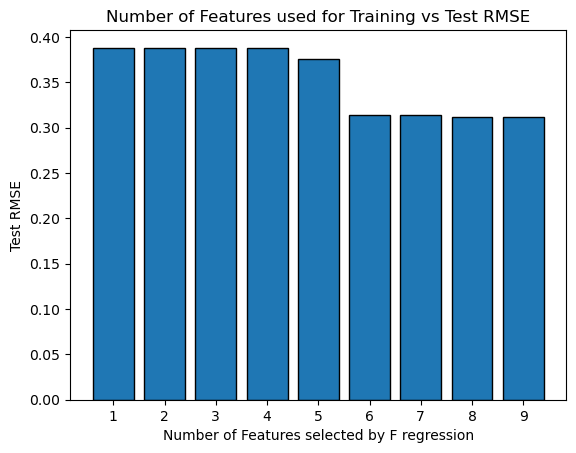

In [37]:
# It is not true for all models, consider Lasso, high alpha
clf = Lasso(alpha = 1e-2)

rms_list = []
for k in range(1,10):
    m_i_selector = SelectKBest(mutual_info_regression, k = k)
    selected_train_features = m_i_selector.fit_transform(df_train_features_ss,np.array(df_train_labels_ss).reshape(-1,))
    selected_test_features = m_i_selector.transform(df_test_features_ss)
    lr_fit = clf.fit(selected_train_features,df_train_labels_ss)
    preds = lr_fit.predict(selected_test_features)
    rms = mean_squared_error(df_test_labels_ss, preds, squared=False)
    print(k,rms)
    sort_idx_mi = np.argsort(m_i_selector.scores_)[::-1]
    print("Sorted selected names(in decreasing order): ", m_i_selector.feature_names_in_[sort_idx_mi[:k]])
    rms_list.append(np.mean(rms))
    
plt.bar(np.arange(1,10),rms_list, label = np.arange(1,10),edgecolor = "Black")
plt.xticks(np.arange(1,10))
plt.title("Number of Features used for Training vs Test RMSE")
plt.ylabel("Test RMSE")
plt.xlabel("Number of Features selected by MI")
plt.show()

rms_list_f = []
for k in range(1,10):
    f_selector = SelectKBest(f_regression, k = k)
    selected_train_features = f_selector.fit_transform(df_train_features_ss,np.array(df_train_labels_ss).reshape(-1,))
    selected_test_features = f_selector.transform(df_test_features_ss)
    lr_fit = clf.fit(selected_train_features,df_train_labels_ss)
    preds = lr_fit.predict(selected_test_features)
    rms = mean_squared_error(df_test_labels_ss, preds, squared=False)
    print(k,rms)
    sort_idx_f = np.argsort(f_selector.scores_)[::-1]
    print("Sorted selected names(in decreasing order): ", f_selector.feature_names_in_[sort_idx_f[:k]])
    rms_list_f.append(np.mean(rms))
    
plt.bar(np.arange(1,10),rms_list_f, label = np.arange(1,10),edgecolor = "Black")
plt.xticks(np.arange(1,10))
plt.title("Number of Features used for Training vs Test RMSE")
plt.ylabel("Test RMSE")
plt.xlabel("Number of Features selected by F regression")
plt.show()

1 0.38855631426847104
Sorted selected names(in decreasing order):  ['carat']
2 0.3902186833278389
Sorted selected names(in decreasing order):  ['carat' 'y']
3 0.39129424879561314
Sorted selected names(in decreasing order):  ['carat' 'y' 'x']
4 0.3908119182743205
Sorted selected names(in decreasing order):  ['carat' 'y' 'x' 'z']
5 0.3436898407393806
Sorted selected names(in decreasing order):  ['carat' 'y' 'x' 'z' 'clarity']
6 0.3199129528073647
Sorted selected names(in decreasing order):  ['carat' 'y' 'x' 'z' 'clarity' 'color']
7 0.3175068867946442
Sorted selected names(in decreasing order):  ['carat' 'y' 'x' 'z' 'clarity' 'color' 'cut']
8 0.317359332843587
Sorted selected names(in decreasing order):  ['carat' 'y' 'x' 'z' 'clarity' 'color' 'cut' 'depth']
9 0.317235623142601
Sorted selected names(in decreasing order):  ['carat' 'y' 'x' 'z' 'clarity' 'color' 'cut' 'table' 'depth']


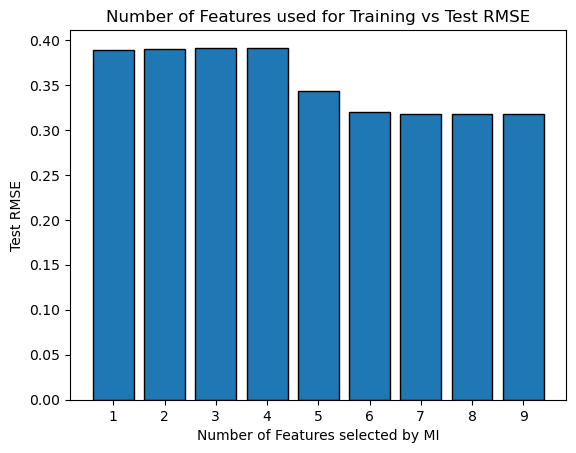

1 0.38855631426847104
Sorted selected names(in decreasing order):  ['carat']
2 0.3911411911216699
Sorted selected names(in decreasing order):  ['carat' 'x']
3 0.39129424879561314
Sorted selected names(in decreasing order):  ['carat' 'x' 'y']
4 0.3908119182743205
Sorted selected names(in decreasing order):  ['carat' 'x' 'y' 'z']
5 0.3783916316241726
Sorted selected names(in decreasing order):  ['carat' 'x' 'y' 'z' 'color']
6 0.3199129528073647
Sorted selected names(in decreasing order):  ['carat' 'x' 'y' 'z' 'color' 'clarity']
7 0.3193057701604406
Sorted selected names(in decreasing order):  ['carat' 'x' 'y' 'z' 'color' 'clarity' 'table']
8 0.31750494037195054
Sorted selected names(in decreasing order):  ['carat' 'x' 'y' 'z' 'color' 'clarity' 'table' 'cut']
9 0.317235623142601
Sorted selected names(in decreasing order):  ['carat' 'x' 'y' 'z' 'color' 'clarity' 'table' 'cut' 'depth']


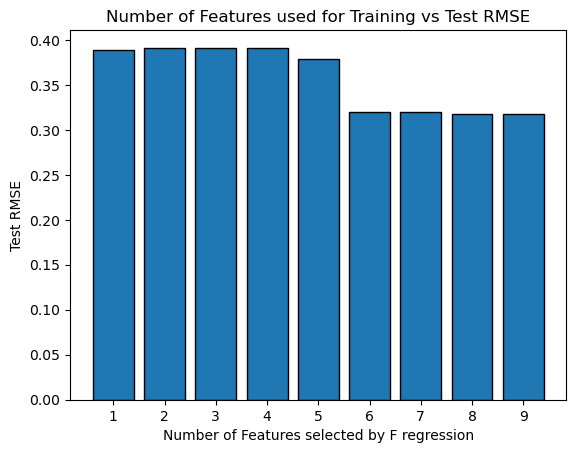

In [38]:
# It is not true for all models, consider Ridge, high alpha
clf = Ridge(alpha = 1e3)

rms_list = []
for k in range(1,10):
    m_i_selector = SelectKBest(mutual_info_regression, k = k)
    selected_train_features = m_i_selector.fit_transform(df_train_features_ss,np.array(df_train_labels_ss).reshape(-1,))
    selected_test_features = m_i_selector.transform(df_test_features_ss)
    lr_fit = clf.fit(selected_train_features,df_train_labels_ss)
    preds = lr_fit.predict(selected_test_features)
    rms = mean_squared_error(df_test_labels_ss, preds, squared=False)
    print(k,rms)
    sort_idx_mi = np.argsort(m_i_selector.scores_)[::-1]
    print("Sorted selected names(in decreasing order): ", m_i_selector.feature_names_in_[sort_idx_mi[:k]])
    rms_list.append(np.mean(rms))
    
plt.bar(np.arange(1,10),rms_list, label = np.arange(1,10),edgecolor = "Black")
plt.xticks(np.arange(1,10))
plt.title("Number of Features used for Training vs Test RMSE")
plt.ylabel("Test RMSE")
plt.xlabel("Number of Features selected by MI")
plt.show()

rms_list_f = []
for k in range(1,10):
    f_selector = SelectKBest(f_regression, k = k)
    selected_train_features = f_selector.fit_transform(df_train_features_ss,np.array(df_train_labels_ss).reshape(-1,))
    selected_test_features = f_selector.transform(df_test_features_ss)
    lr_fit = clf.fit(selected_train_features,df_train_labels_ss)
    preds = lr_fit.predict(selected_test_features)
    rms = mean_squared_error(df_test_labels_ss, preds, squared=False)
    print(k,rms)
    sort_idx_f = np.argsort(f_selector.scores_)[::-1]
    print("Sorted selected names(in decreasing order): ", f_selector.feature_names_in_[sort_idx_f[:k]])
    rms_list_f.append(np.mean(rms))
    
plt.bar(np.arange(1,10),rms_list_f, label = np.arange(1,10),edgecolor = "Black")
plt.xticks(np.arange(1,10))
plt.title("Number of Features used for Training vs Test RMSE")
plt.ylabel("Test RMSE")
plt.xlabel("Number of Features selected by F regression")
plt.show()

1 0.3883864339984015
Sorted selected names(in decreasing order):  ['carat']
2 0.3859389201177311
Sorted selected names(in decreasing order):  ['carat' 'y']
3 0.38272784229888157
Sorted selected names(in decreasing order):  ['carat' 'y' 'x']
4 0.38141144586445824
Sorted selected names(in decreasing order):  ['carat' 'y' 'x' 'z']
5 0.33571237023205885
Sorted selected names(in decreasing order):  ['carat' 'y' 'x' 'z' 'clarity']
6 0.3100474268635244
Sorted selected names(in decreasing order):  ['carat' 'y' 'x' 'z' 'clarity' 'color']
7 0.3075749936889223
Sorted selected names(in decreasing order):  ['carat' 'y' 'x' 'z' 'clarity' 'color' 'cut']
8 0.3071405339331496
Sorted selected names(in decreasing order):  ['carat' 'y' 'x' 'z' 'clarity' 'color' 'cut' 'depth']
9 0.30692293047697033
Sorted selected names(in decreasing order):  ['carat' 'y' 'x' 'z' 'clarity' 'color' 'cut' 'depth' 'table']


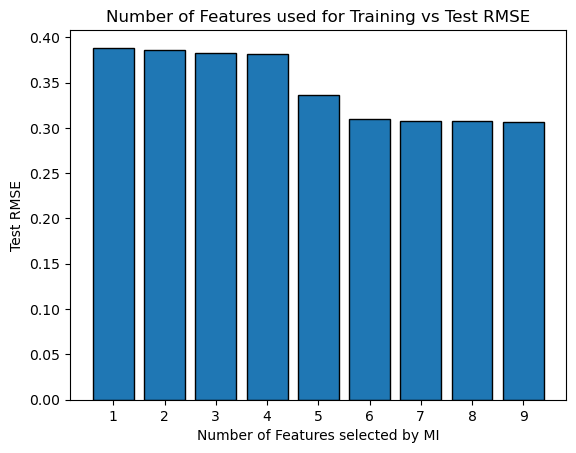

1 0.3883864339984015
Sorted selected names(in decreasing order):  ['carat']
2 0.3829018451946015
Sorted selected names(in decreasing order):  ['carat' 'x']
3 0.38272784229888157
Sorted selected names(in decreasing order):  ['carat' 'x' 'y']
4 0.38141144586445824
Sorted selected names(in decreasing order):  ['carat' 'x' 'y' 'z']
5 0.36756612834361124
Sorted selected names(in decreasing order):  ['carat' 'x' 'y' 'z' 'color']
6 0.3100474268635244
Sorted selected names(in decreasing order):  ['carat' 'x' 'y' 'z' 'color' 'clarity']
7 0.30925711462045397
Sorted selected names(in decreasing order):  ['carat' 'x' 'y' 'z' 'color' 'clarity' 'table']
8 0.307539377182256
Sorted selected names(in decreasing order):  ['carat' 'x' 'y' 'z' 'color' 'clarity' 'table' 'cut']
9 0.30692293047697033
Sorted selected names(in decreasing order):  ['carat' 'x' 'y' 'z' 'color' 'clarity' 'table' 'cut' 'depth']


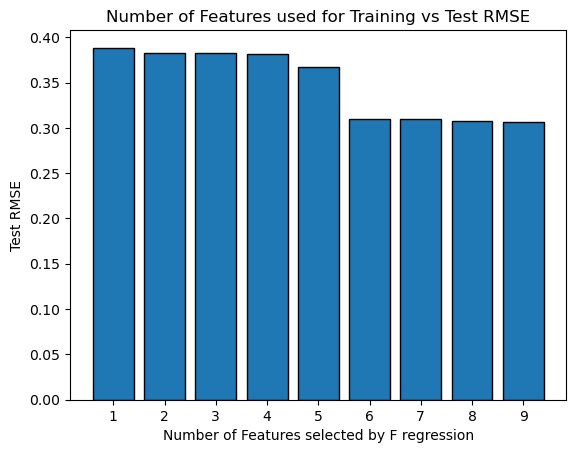

In [39]:
# It is not true for all models, consider Lasso, high alpha
clf = Ridge(alpha = 1e-1)

rms_list = []
for k in range(1,10):
    m_i_selector = SelectKBest(mutual_info_regression, k = k)
    selected_train_features = m_i_selector.fit_transform(df_train_features_ss,np.array(df_train_labels_ss).reshape(-1,))
    selected_test_features = m_i_selector.transform(df_test_features_ss)
    lr_fit = clf.fit(selected_train_features,df_train_labels_ss)
    preds = lr_fit.predict(selected_test_features)
    rms = mean_squared_error(df_test_labels_ss, preds, squared=False)
    print(k,rms)
    sort_idx_mi = np.argsort(m_i_selector.scores_)[::-1]
    print("Sorted selected names(in decreasing order): ", m_i_selector.feature_names_in_[sort_idx_mi[:k]])
    rms_list.append(np.mean(rms))
    
plt.bar(np.arange(1,10),rms_list, label = np.arange(1,10),edgecolor = "Black")
plt.xticks(np.arange(1,10))
plt.title("Number of Features used for Training vs Test RMSE")
plt.ylabel("Test RMSE")
plt.xlabel("Number of Features selected by MI")
plt.show()

rms_list_f = []
for k in range(1,10):
    f_selector = SelectKBest(f_regression, k = k)
    selected_train_features = f_selector.fit_transform(df_train_features_ss,np.array(df_train_labels_ss).reshape(-1,))
    selected_test_features = f_selector.transform(df_test_features_ss)
    lr_fit = clf.fit(selected_train_features,df_train_labels_ss)
    preds = lr_fit.predict(selected_test_features)
    rms = mean_squared_error(df_test_labels_ss, preds, squared=False)
    print(k,rms)
    sort_idx_f = np.argsort(f_selector.scores_)[::-1]
    print("Sorted selected names(in decreasing order): ", f_selector.feature_names_in_[sort_idx_f[:k]])
    rms_list_f.append(np.mean(rms))
    
plt.bar(np.arange(1,10),rms_list_f, label = np.arange(1,10),edgecolor = "Black")
plt.xticks(np.arange(1,10))
plt.title("Number of Features used for Training vs Test RMSE")
plt.ylabel("Test RMSE")
plt.xlabel("Number of Features selected by F regression")
plt.show()

1 0.35835439224989535
Sorted selected names(in decreasing order):  ['carat']
2 0.3454236926369941
Sorted selected names(in decreasing order):  ['carat' 'y']
3 0.34454910425412166
Sorted selected names(in decreasing order):  ['carat' 'y' 'x']
4 0.35452335406696983
Sorted selected names(in decreasing order):  ['carat' 'y' 'x' 'z']
5 0.2563503407168924
Sorted selected names(in decreasing order):  ['carat' 'y' 'x' 'z' 'clarity']
6 0.1520446847571599
Sorted selected names(in decreasing order):  ['carat' 'y' 'x' 'z' 'clarity' 'color']
7 0.1454247744068123
Sorted selected names(in decreasing order):  ['carat' 'y' 'x' 'z' 'clarity' 'color' 'cut']
8 0.15188671833713838
Sorted selected names(in decreasing order):  ['carat' 'y' 'x' 'z' 'clarity' 'color' 'cut' 'table']
9 0.1426029989283334
Sorted selected names(in decreasing order):  ['carat' 'y' 'x' 'z' 'clarity' 'color' 'cut' 'depth' 'table']


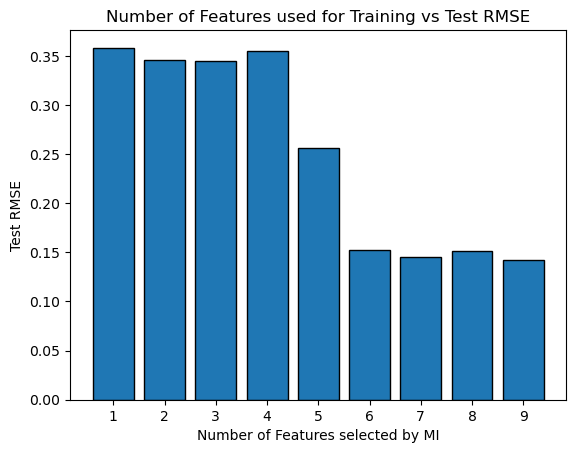

1 0.3577221707618909
Sorted selected names(in decreasing order):  ['carat']
2 0.352961459522931
Sorted selected names(in decreasing order):  ['carat' 'x']
3 0.3439239658034982
Sorted selected names(in decreasing order):  ['carat' 'x' 'y']
4 0.34200615056764705
Sorted selected names(in decreasing order):  ['carat' 'x' 'y' 'z']
5 0.3031297206900915
Sorted selected names(in decreasing order):  ['carat' 'x' 'y' 'z' 'color']
6 0.15192837737971374
Sorted selected names(in decreasing order):  ['carat' 'x' 'y' 'z' 'color' 'clarity']
7 0.15330742708238312
Sorted selected names(in decreasing order):  ['carat' 'x' 'y' 'z' 'color' 'clarity' 'table']
8 0.1438150069395695
Sorted selected names(in decreasing order):  ['carat' 'x' 'y' 'z' 'color' 'clarity' 'table' 'cut']
9 0.14570367841691315
Sorted selected names(in decreasing order):  ['carat' 'x' 'y' 'z' 'color' 'clarity' 'table' 'cut' 'depth']


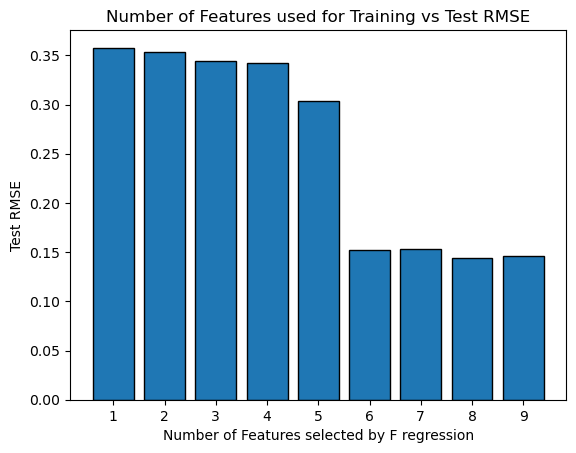

In [40]:
from sklearn.neural_network import MLPRegressor

clf = MLPRegressor(alpha = 0.000001 , hidden_layer_sizes = (10,10), activation = "relu")

rms_list = []
for k in range(1,10):
    m_i_selector = SelectKBest(mutual_info_regression, k = k)
    selected_train_features = m_i_selector.fit_transform(df_train_features_ss,np.array(df_train_labels_ss).reshape(-1,))
    selected_test_features = m_i_selector.transform(df_test_features_ss)
    lr_fit = clf.fit(selected_train_features,np.array(df_train_labels_ss).ravel())
    preds = lr_fit.predict(selected_test_features)
    rms = mean_squared_error(df_test_labels_ss, preds, squared=False)
    print(k,rms)
    sort_idx_mi = np.argsort(m_i_selector.scores_)[::-1]
    print("Sorted selected names(in decreasing order): ", m_i_selector.feature_names_in_[sort_idx_mi[:k]])
    rms_list.append(np.mean(rms))
    
plt.bar(np.arange(1,10),rms_list, label = np.arange(1,10),edgecolor = "Black")
plt.xticks(np.arange(1,10))
plt.title("Number of Features used for Training vs Test RMSE")
plt.ylabel("Test RMSE")
plt.xlabel("Number of Features selected by MI")
plt.show()

rms_list_f = []
for k in range(1,10):
    f_selector = SelectKBest(f_regression, k = k)
    selected_train_features = f_selector.fit_transform(df_train_features_ss,np.array(df_train_labels_ss).reshape(-1,))
    selected_test_features = f_selector.transform(df_test_features_ss)
    lr_fit = clf.fit(selected_train_features,np.array(df_train_labels_ss).ravel())
    preds = lr_fit.predict(selected_test_features)
    rms = mean_squared_error(df_test_labels_ss, preds, squared=False)
    print(k,rms)
    sort_idx_f = np.argsort(f_selector.scores_)[::-1]
    print("Sorted selected names(in decreasing order): ", f_selector.feature_names_in_[sort_idx_f[:k]])
    rms_list_f.append(np.mean(rms))
    
plt.bar(np.arange(1,10),rms_list_f, label = np.arange(1,10),edgecolor = "Black")
plt.xticks(np.arange(1,10))
plt.title("Number of Features used for Training vs Test RMSE")
plt.ylabel("Test RMSE")
plt.xlabel("Number of Features selected by F regression")
plt.show()

1 0.3586727338199768
Sorted selected names(in decreasing order):  ['carat']
2 0.35542494714104206
Sorted selected names(in decreasing order):  ['carat' 'y']
3 0.3472910458708045
Sorted selected names(in decreasing order):  ['carat' 'y' 'x']
4 0.3386846592154052
Sorted selected names(in decreasing order):  ['carat' 'y' 'x' 'z']
5 0.2439617128531901
Sorted selected names(in decreasing order):  ['carat' 'y' 'x' 'z' 'clarity']
6 0.13762335058811218
Sorted selected names(in decreasing order):  ['carat' 'y' 'x' 'z' 'clarity' 'color']
7 0.1356077912728607
Sorted selected names(in decreasing order):  ['carat' 'y' 'x' 'z' 'clarity' 'color' 'cut']
8 0.1360335846914165
Sorted selected names(in decreasing order):  ['carat' 'y' 'x' 'z' 'clarity' 'color' 'cut' 'depth']
9 0.13476374122543455
Sorted selected names(in decreasing order):  ['carat' 'y' 'x' 'z' 'clarity' 'color' 'cut' 'depth' 'table']


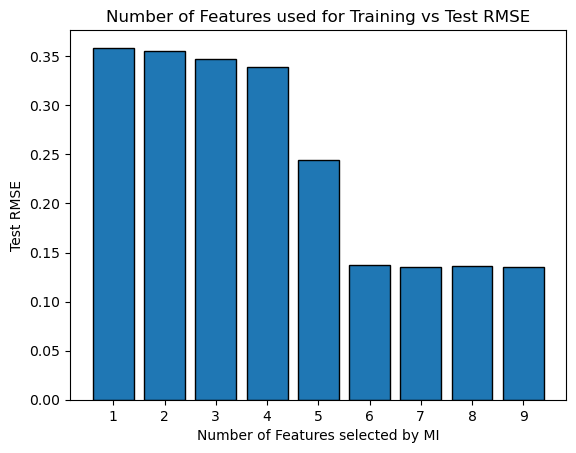

1 0.3588404676765344
Sorted selected names(in decreasing order):  ['carat']
2 0.35931046906950437
Sorted selected names(in decreasing order):  ['carat' 'x']
3 0.3478344543797013
Sorted selected names(in decreasing order):  ['carat' 'x' 'y']
4 0.33885463265631316
Sorted selected names(in decreasing order):  ['carat' 'x' 'y' 'z']
5 0.2888984695931645
Sorted selected names(in decreasing order):  ['carat' 'x' 'y' 'z' 'color']
6 0.13823193435475958
Sorted selected names(in decreasing order):  ['carat' 'x' 'y' 'z' 'color' 'clarity']
7 0.13646690400186123
Sorted selected names(in decreasing order):  ['carat' 'x' 'y' 'z' 'color' 'clarity' 'table']
8 0.1350683033438974
Sorted selected names(in decreasing order):  ['carat' 'x' 'y' 'z' 'color' 'clarity' 'table' 'cut']
9 0.1351873098911424
Sorted selected names(in decreasing order):  ['carat' 'x' 'y' 'z' 'color' 'clarity' 'table' 'cut' 'depth']


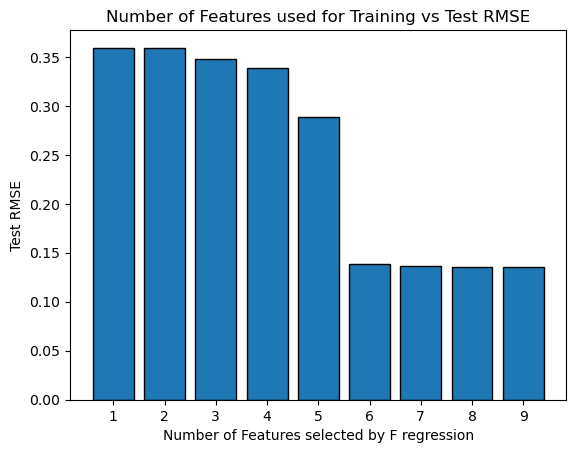

In [41]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(max_depth = 15,n_estimators = 100)
rms_list = []
for k in range(1,10):
    m_i_selector = SelectKBest(mutual_info_regression, k = k)
    selected_train_features = m_i_selector.fit_transform(df_train_features_ss,np.array(df_train_labels_ss).reshape(-1,))
    selected_test_features = m_i_selector.transform(df_test_features_ss)
    lr_fit = clf.fit(selected_train_features,np.array(df_train_labels_ss).ravel())
    preds = lr_fit.predict(selected_test_features)
    rms = mean_squared_error(df_test_labels_ss, preds, squared=False)
    print(k,rms)
    sort_idx_mi = np.argsort(m_i_selector.scores_)[::-1]
    print("Sorted selected names(in decreasing order): ", m_i_selector.feature_names_in_[sort_idx_mi[:k]])
    rms_list.append(np.mean(rms))
    
plt.bar(np.arange(1,10),rms_list, label = np.arange(1,10),edgecolor = "Black")
plt.xticks(np.arange(1,10))
plt.title("Number of Features used for Training vs Test RMSE")
plt.ylabel("Test RMSE")
plt.xlabel("Number of Features selected by MI")
plt.show()

rms_list_f = []
for k in range(1,10):
    f_selector = SelectKBest(f_regression, k = k)
    selected_train_features = f_selector.fit_transform(df_train_features_ss,np.array(df_train_labels_ss).reshape(-1,))
    selected_test_features = f_selector.transform(df_test_features_ss)
    lr_fit = clf.fit(selected_train_features,np.array(df_train_labels_ss).ravel())
    preds = lr_fit.predict(selected_test_features)
    rms = mean_squared_error(df_test_labels_ss, preds, squared=False)
    print(k,rms)
    sort_idx_f = np.argsort(f_selector.scores_)[::-1]
    print("Sorted selected names(in decreasing order): ", f_selector.feature_names_in_[sort_idx_f[:k]])
    rms_list_f.append(np.mean(rms))
    
plt.bar(np.arange(1,10),rms_list_f, label = np.arange(1,10),edgecolor = "Black")
plt.xticks(np.arange(1,10))
plt.title("Number of Features used for Training vs Test RMSE")
plt.ylabel("Test RMSE")
plt.xlabel("Number of Features selected by F regression")
plt.show()


In [42]:
# Consider Ridge(1e3), RMSE increases then decreases, It is not true for all model type

#TWO LOWEST MI are depth and table 0.03062819 0.02940345

In [43]:
# Part 3.2 
# Answer Part 3.3 Question 3